In [1]:
#pip install requests

In [2]:
#pip install simplejson

In [3]:
#pip install matplotlib

In [4]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [5]:
#pip install sqlalchemy

In [6]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [7]:
#pip install pandas_datareader

In [8]:
pip install ta

Note: you may need to restart the kernel to use updated packages.


In [9]:
'''
import importlib
import subprocess
import sys

def install_dependencies(packages):
    """
    Installs only the missing packages or reinstalls them if they already exist.

    Args:
        packages (dict): A dictionary where the key is the package name 
                         and the value is the version (optional).
    """
    for package, version in packages.items():
        try:
            # Check if the package is already installed
            importlib.import_module(package)
            print(f"{package} is already installed. Uninstalling and reinstalling...")
            # Uninstall the package if it's already installed
            #subprocess.check_call([sys.executable, "-m", "pip", "uninstall", f"{package}", "-y"])
        except ImportError:
            print(f"{package} is not installed. Installing now...")

        # Install the package (after uninstalling if it existed)
        if version:
            subprocess.check_call([sys.executable, "-m", "pip", "install", f"{package}=={version}", "--upgrade", "--no-cache-dir"])
        else:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package, "--upgrade", "--no-cache-dir"])

# Define your dependencies (key: package name, value: version or None for latest)
dependencies = {
    "requests": None,
    "numpy": "1.24.4",
    "yfinance": "0.2.52",
    "simplejson": "3.19.3",
    "matplotlib": None,
    "sqlalchemy": "2.0.38",
    "pymysql": "1.1.1",
    "pandas_datareader": "0.10.0",
    "ta": "0.11.0"   
}

# Install the required dependencies
install_dependencies(dependencies)
'''



'\nimport importlib\nimport subprocess\nimport sys\n\ndef install_dependencies(packages):\n    """\n    Installs only the missing packages or reinstalls them if they already exist.\n\n    Args:\n        packages (dict): A dictionary where the key is the package name \n                         and the value is the version (optional).\n    """\n    for package, version in packages.items():\n        try:\n            # Check if the package is already installed\n            importlib.import_module(package)\n            print(f"{package} is already installed. Uninstalling and reinstalling...")\n            # Uninstall the package if it\'s already installed\n            #subprocess.check_call([sys.executable, "-m", "pip", "uninstall", f"{package}", "-y"])\n        except ImportError:\n            print(f"{package} is not installed. Installing now...")\n\n        # Install the package (after uninstalling if it existed)\n        if version:\n            subprocess.check_call([sys.executable, "

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
import json
from datetime import datetime,timedelta

In [12]:
import requests

In [13]:
import os
path = os.path.join('/home','jovyan','files', 'datasets')

In [14]:
from datetime import datetime

def convert_to_date(date_string, date_format="%Y-%m-%d"):
    """
    Converts a date string to a datetime object.
    
    Args:
        date_string (str): The date as a string.
        date_format (str): The format of the date string (default is '%Y-%m-%d').
    
    Returns:
        datetime: A datetime object representing the date, or None if conversion fails.
    """
    try:
        return datetime.strptime(date_string, date_format)
    except ValueError:
        print(f"Error: '{date_string}' does not match the format '{date_format}'")
        return None



In [15]:
import yfinance as yf



def fetch_daily_data(symbol, start_date, end_date):
    # Download historical data from Yahoo Finance
    ticker = yf.Ticker(symbol)  # Symbol is like 'BTC-USD', 'ETH-USD', etc.
    #path =f'/../datasets'
   
    # Fetch data for the specified date range
    data = ticker.history(start=start_date, end=end_date, interval="1d")
  
    if data.empty:
        print(f"No data available for {symbol} between {start_date} and {end_date}")
    else:
        # File name based on symbol and start date
        filename = f'Yahoo_Finance_{symbol}_{start_date.strftime("%Y_%m_%d")}.csv'

           
         # Convert 'Date' column to datetime if not already
        #data['NewDate'] = convert_to_date (data['Date'])

        # Process data
        data['vol_fiat'] = data['Volume'] * data['Close']  # Calculate fiat volume
        data['Provider'] = "Yahoo Finance"
        data['Asset'] = symbol
        
        # Save to CSV
        file_path = os.path.join(path, filename)
        data.to_csv(file_path, index=True)  # 'index=True' to include the date column
        print(f"Data saved to {filename}")



        

In [16]:
if __name__ == "__main__":
    pair = "BTC-USD"
    start = datetime.strptime("2015-01-01","%Y-%m-%d")
    today = pd.to_datetime('today').normalize()
    while(start <= today):
        end = start + timedelta(days=180)
        fetch_daily_data(symbol=pair,start_date=start,end_date=end)
        start = end + timedelta(days=1)

Data saved to Yahoo_Finance_BTC-USD_2015_01_01.csv
Data saved to Yahoo_Finance_BTC-USD_2015_07_01.csv
Data saved to Yahoo_Finance_BTC-USD_2015_12_29.csv
Data saved to Yahoo_Finance_BTC-USD_2016_06_27.csv
Data saved to Yahoo_Finance_BTC-USD_2016_12_25.csv
Data saved to Yahoo_Finance_BTC-USD_2017_06_24.csv
Data saved to Yahoo_Finance_BTC-USD_2017_12_22.csv
Data saved to Yahoo_Finance_BTC-USD_2018_06_21.csv
Data saved to Yahoo_Finance_BTC-USD_2018_12_19.csv
Data saved to Yahoo_Finance_BTC-USD_2019_06_18.csv
Data saved to Yahoo_Finance_BTC-USD_2019_12_16.csv
Data saved to Yahoo_Finance_BTC-USD_2020_06_14.csv
Data saved to Yahoo_Finance_BTC-USD_2020_12_12.csv
Data saved to Yahoo_Finance_BTC-USD_2021_06_11.csv
Data saved to Yahoo_Finance_BTC-USD_2021_12_09.csv
Data saved to Yahoo_Finance_BTC-USD_2022_06_08.csv
Data saved to Yahoo_Finance_BTC-USD_2022_12_06.csv
Data saved to Yahoo_Finance_BTC-USD_2023_06_05.csv
Data saved to Yahoo_Finance_BTC-USD_2023_12_03.csv
Data saved to Yahoo_Finance_BTC

In [17]:
import glob

combined_df = ""

csv_files = glob.glob(f"{path}/Yahoo_Finance_BTC-USD*.csv")

dataframes = []

for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)

combined_df.drop_duplicates()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,vol_fiat,Provider,Asset
0,2015-01-01 00:00:00+00:00,320.434998,320.434998,314.002991,314.248993,8036550,0.0,0.0,2.525478e+09,Yahoo Finance,BTC-USD
1,2015-01-02 00:00:00+00:00,314.079010,315.838989,313.565002,315.032013,7860650,0.0,0.0,2.476356e+09,Yahoo Finance,BTC-USD
2,2015-01-03 00:00:00+00:00,314.846008,315.149994,281.082001,281.082001,33054400,0.0,0.0,9.290997e+09,Yahoo Finance,BTC-USD
3,2015-01-04 00:00:00+00:00,281.145996,287.230011,257.612000,264.195007,55629100,0.0,0.0,1.469693e+10,Yahoo Finance,BTC-USD
4,2015-01-05 00:00:00+00:00,265.084015,278.341003,265.084015,274.473999,43962800,0.0,0.0,1.206665e+10,Yahoo Finance,BTC-USD
...,...,...,...,...,...,...,...,...,...,...,...
3672,2025-02-09 00:00:00+00:00,96481.312500,97325.281250,94745.257812,96500.093750,27732901800,0.0,0.0,2.676228e+15,Yahoo Finance,BTC-USD
3673,2025-02-10 00:00:00+00:00,96499.460938,98333.218750,95320.843750,97437.554688,40078962391,0.0,0.0,3.905196e+15,Yahoo Finance,BTC-USD
3674,2025-02-11 00:00:00+00:00,97438.132812,98492.898438,94875.039062,95747.429688,37488783272,0.0,0.0,3.589455e+15,Yahoo Finance,BTC-USD
3675,2025-02-12 00:00:00+00:00,95745.695312,98151.023438,94101.203125,97885.859375,49340445530,0.0,0.0,4.829732e+15,Yahoo Finance,BTC-USD


In [18]:
import os
from sqlalchemy import create_engine

# Load environment variables
MYSQL_USER = "bitcoin_user"
MYSQL_PASSWORD = os.getenv("MYSQL_PASSWORD", "default_password")  # Ensure this is set in .env
MYSQL_HOST = "172.29.0.2"  # Matches the MySQL container IP in docker-compose
MYSQL_DB = "bitcoin_db"




In [19]:
print (MYSQL_USER)

bitcoin_user


In [20]:
# Create the SQLAlchemy engine
engine = create_engine(f'mysql+pymysql://{MYSQL_USER}:{MYSQL_PASSWORD}@{MYSQL_HOST}:3306/{MYSQL_DB}')

# Test connection
try:
    with engine.connect() as connection:
        print("Connection successful!")
except Exception as e:
    print(f"Connection failed: {e}")

Connection successful!


In [21]:
combined_df.to_sql('crypto', con=engine, if_exists='replace', index=False)

3677

In [22]:
#https://alternative.me/crypto/fear-and-greed-index/
import requests
import pandas as pd


url = 'https://api.alternative.me/fng/?limit=0'

response = requests.get(url)
response.raise_for_status()  
data = response.json()['data']
df = pd.DataFrame(data)
# Convert 'timestamp' to datetime and set timezone to UTC
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s', utc=True)
df.to_sql('FearGreedIndex', con=engine, if_exists='replace', index=False)

/tmp/ipykernel_4387/3393799420.py:13: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s', utc=True)


2566

In [23]:
query = """
SELECT `Date`, `Open`, High, Low, `Close`, Volume, cast(fgi.value AS UNSIGNED) as FGI
FROM bitcoin_db.crypto btc
LEFT JOIN bitcoin_db.FearGreedIndex fgi
ON btc.`Date` = fgi.`timestamp`
Order by 1
"""

data = pd.read_sql(query,con=engine)
data.head()

,Date,Open,High,Low,Close,Volume,FGI
0,2015-01-01 00:00:00+00:00,320.434998,320.434998,314.002991,314.248993,8036550,NaN
1,2015-01-02 00:00:00+00:00,314.079010,315.838989,313.565002,315.032013,7860650,NaN
2,2015-01-03 00:00:00+00:00,314.846008,315.149994,281.082001,281.082001,33054400,NaN
3,2015-01-04 00:00:00+00:00,281.145996,287.230011,257.612000,264.195007,55629100,NaN
4,2015-01-05 00:00:00+00:00,265.084015,278.341003,265.084015,274.473999,43962800,NaN


In [24]:
# Calculate the average of the FGI column, excluding NaN values
fg_average = data['FGI'].mean()

# Fill NaN values in the FGI column with the calculated average
data['FGI'].fillna(fg_average, inplace=True)

In [25]:
import ta

In [26]:
#https://www.investopedia.com/terms/m/macd.asp
#macd_object = ta.trend.MACD(data['close'])
macd_object = ta.trend.MACD(data['Close'], window_slow = 26, window_fast = 12, window_sign = 9, fillna= True)
data['MACD'] = macd_object.macd()
data['MACD_Signal'] = macd_object.macd_signal()
data['MACD_Diff'] = macd_object.macd_diff()
#data.tail()

In [27]:
#https://www.investopedia.com/terms/m/mfi.asp
mfi_indicator = ta.volume.MFIIndicator(high=data['High'], low=data['Low'], close=data['Close'], volume=data['Volume'], window=14)
data['mfi'] = mfi_indicator.money_flow_index()

In [28]:
# RSI
rsi = ta.momentum.rsi(data['Close'], window=14, fillna=True)
data['RSI'] = rsi

In [29]:
# EMA
ema_short = ta.trend.EMAIndicator(data['Close'], window=12, fillna=True)
ema_long = ta.trend.EMAIndicator(data['Close'], window=26, fillna=True)
data['EMA_Short'] = ema_short.ema_indicator()
data['EMA_Long'] = ema_long.ema_indicator()

In [30]:
# Bollinger Bands
bollinger = ta.volatility.BollingerBands(data['Close'], window=20, window_dev=2, fillna=True)
data['Bollinger_Upper'] = bollinger.bollinger_hband()
data['Bollinger_Lower'] = bollinger.bollinger_lband()
data['Bollinger_Middle'] = bollinger.bollinger_mavg()

In [31]:
# Stochastic Oscillator
stoch = ta.momentum.StochasticOscillator(data['High'], data['Low'], data['Close'], window=14, smooth_window=3, fillna=True)
data['Stochastic'] = stoch.stoch()
data['Stochastic_Signal'] = stoch.stoch_signal()

In [32]:
# ATR
atr = ta.volatility.AverageTrueRange(data['High'], data['Low'], data['Close'], window=14, fillna=True)
data['ATR'] = atr.average_true_range()

In [33]:
# Parabolic SAR
sar = ta.trend.PSARIndicator(data['High'], data['Low'], data['Close'], fillna=True)
data['SAR'] = sar.psar()

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prepare the data (assuming 'data' is already pre-processed with features)
data['Date'] = pd.to_datetime(data['Date'], utc=True)
data['Target'] = data['Close'].shift(-1)
data = data.dropna(subset=['Target'])

# Select features (excluding 'Date')
features = [
     'Bollinger_Upper', 'Bollinger_Lower', 'Bollinger_Middle','FGI', 'Close'
]

X = data[features]
y = data['Target']

In [35]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [36]:
# Standardize the features
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

In [37]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Make predictions for the next closing price
# Use the last row from X_test (or any new data)
latest_data = X_test.iloc[-1:]  # Keep it as a DataFrame (not numpy array)

# Apply the same scaling to the latest data
latest_data_scaled = scaler.transform(latest_data)  # The feature names are kept

# Make prediction for the next closing price
next_close_pred = model.predict(latest_data_scaled)
print(f"Predicted next closing price: {next_close_pred[0]}")

Mean Absolute Error: 969.7023837614101
Mean Squared Error: 2230225.6787954727
R-squared: 0.9960855873729787
Predicted next closing price: 97570.76962379733


In [38]:
# Extract the coefficients and the intercept
coefficients = model.coef_
intercept = model.intercept_

# Create a dictionary mapping feature names to their corresponding coefficients
feature_names = X.columns
equation = f"Predicted next closing price = {intercept:.2f}"

# Add each feature and its coefficient to the equation
for feature, coef in zip(feature_names, coefficients):
    equation += f" + ({coef:.2f}) * {feature}"

# Display the equation
print("Final equation for predicting the next closing price:")
print(equation)


Final equation for predicting the next closing price:
Predicted next closing price = 13407.77 + (-440303213374149.56) * Bollinger_Upper + (-342681006077270.69) * Bollinger_Lower + (780111339648421.50) * Bollinger_Middle + (41.48) * FGI + (16081.45) * Close


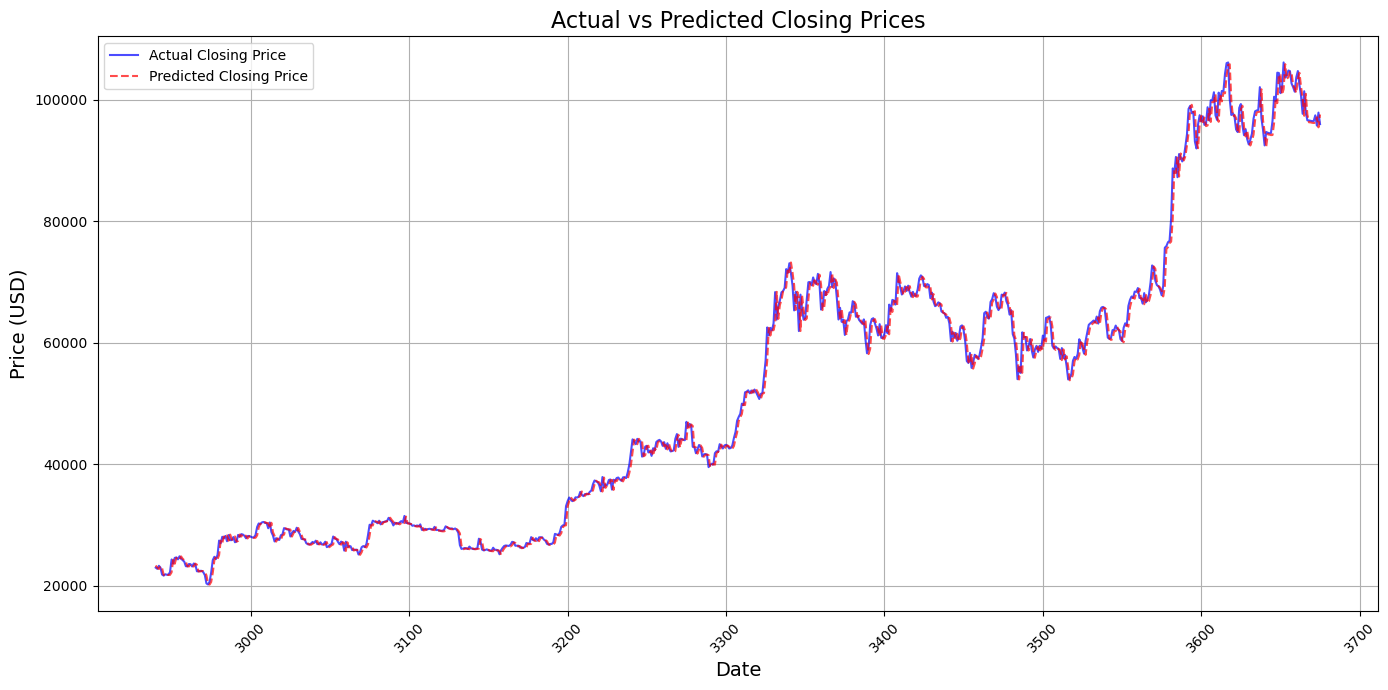

In [39]:
import matplotlib.pyplot as plt

# Create a DataFrame to store the actual vs predicted values
results = pd.DataFrame({
    'Date': X_test.index,
    'Actual': y_test,
    'Predicted': y_pred
})

# Plotting the actual vs predicted closing prices
plt.figure(figsize=(14, 7))
plt.plot(results['Date'], results['Actual'], label='Actual Closing Price', color='blue', alpha=0.7)
plt.plot(results['Date'], results['Predicted'], label='Predicted Closing Price', color='red', linestyle='--', alpha=0.7)

# Add titles and labels
plt.title('Actual vs Predicted Closing Prices', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend()
plt.grid(True)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


In [40]:
import statsmodels.api as sm

# Store original column names
original_columns = X_train.columns

# Standardize the features (X_train_scaled) for fitting the model
X_with_intercept = sm.add_constant(X_train_scaled)  # Add intercept term to the features
y_train_array = y_train.values  # Convert to numpy array for Statsmodels compatibility

# Fit the model using Statsmodels
model_sm = sm.OLS(y_train_array, X_with_intercept)  # Ordinary Least Squares Regression
results = model_sm.fit()  # Fit the model

# Display the summary, which includes the p-values for each feature
summary = results.summary()

# Map p-values to the original feature names
p_values = results.pvalues[1:]  # Exclude the intercept (constant)
features_with_p_values = dict(zip(original_columns, p_values))

# Print the p-values for each feature and check significance
print("Feature p-values (human-readable labels):")
for feature, p_value in features_with_p_values.items():
    significance = "Significant" if p_value < 0.05 else "Not Significant"
    print(f"{feature}: {p_value:.4f} ({significance})")

# Optionally, print the full summary
print("\nFull summary with p-values:")
print(summary)




Feature p-values (human-readable labels):
Bollinger_Upper: 0.0023 (Significant)
Bollinger_Lower: 0.0087 (Significant)
Bollinger_Middle: 0.1759 (Not Significant)
FGI: 0.0187 (Significant)
Close: 0.0000 (Significant)

Full summary with p-values:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.963e+05
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:36:28   Log-Likelihood:                -23849.
No. Observations:                2940   AIC:                         4.771e+04
Df Residuals:                    2935   BIC:                         4.774e+04
Df Model:                           4                                         
Covariance Type:            nonrobust        